<a href="https://colab.research.google.com/github/yumi-jun/Data_Analysis/blob/main/%ED%98%84%EB%8C%80%EC%B0%A8%EC%A3%BC%EA%B0%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd

In [83]:
df = yf.download('005380.KS','2019-01-01','2024-06-30')
df.to_csv('현대차')

[*********************100%%**********************]  1 of 1 completed


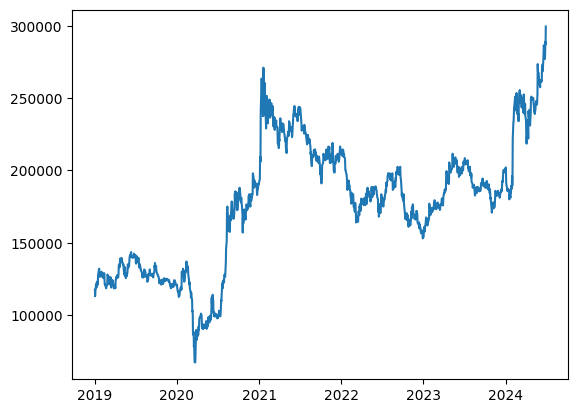

In [84]:
import matplotlib.pyplot as plt
plt.plot(df['Open'])

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,117500.0,118000.0,113500.0,114000.0,95776.906250,565493
2019-01-03,113000.0,118500.0,113000.0,116500.0,97877.273438,608591
2019-01-04,116000.0,123000.0,116000.0,119500.0,100397.726562,1326978
2019-01-07,121000.0,121500.0,119500.0,120500.0,101237.859375,428416
2019-01-08,121500.0,123500.0,118500.0,119500.0,100397.726562,582117


In [26]:
training_set=df.iloc[:,0:1].values
print(training_set.shape)

(1352, 1)


In [27]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
print(training_set_scaled)

[[0.21653035]
 [0.19715885]
 [0.21007318]
 ...
 [0.95479983]
 [0.94619027]
 [1.        ]]


In [51]:
x_train=[]
y_train=[]
for i in range(60,1352):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [52]:
# 3차원 모델 만들
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train)

[[[0.21653035]
  [0.19715885]
  [0.21007318]
  ...
  [0.22083513]
  [0.22729229]
  [0.22729229]]

 [[0.19715885]
  [0.21007318]
  [0.23159707]
  ...
  [0.22729229]
  [0.22729229]
  [0.22513991]]

 [[0.21007318]
  [0.23159707]
  [0.23374946]
  ...
  [0.22729229]
  [0.22513991]
  [0.22083513]]

 ...

 [[0.74817047]
  [0.76969436]
  [0.73525613]
  ...
  [0.93112355]
  [0.90314249]
  [0.9203616 ]]

 [[0.76969436]
  [0.73525613]
  [0.72018941]
  ...
  [0.90314249]
  [0.9203616 ]
  [0.95479983]]

 [[0.73525613]
  [0.72018941]
  [0.67929402]
  ...
  [0.9203616 ]
  [0.95479983]
  [0.94619027]]]


In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

In [54]:
#  LSTM Layer 을 넣는다.
# 드롭 아웃 정규화 : 드롭아웃 비율 20% 떨어트리는,
regressor.add(LSTM(units=70,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [55]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

In [56]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))


In [57]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

In [58]:
regressor.add(LSTM(units = 70))
regressor.add(Dropout(0.2))

In [59]:
# Adding the output layer
regressor.add(Dense(units = 1))


In [64]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [65]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
41/41 [==============================] - 16s 148ms/step - loss: 0.0329
Epoch 2/100
41/41 [==============================] - 7s 178ms/step - loss: 0.0065
Epoch 3/100
41/41 [==============================] - 6s 148ms/step - loss: 0.0057
Epoch 4/100
41/41 [==============================] - 8s 201ms/step - loss: 0.0053
Epoch 5/100
41/41 [==============================] - 8s 187ms/step - loss: 0.0046
Epoch 6/100
41/41 [==============================] - 6s 153ms/step - loss: 0.0051
Epoch 7/100
41/41 [==============================] - 7s 176ms/step - loss: 0.0045
Epoch 8/100
41/41 [==============================] - 7s 172ms/step - loss: 0.0046
Epoch 9/100
41/41 [==============================] - 7s 182ms/step - loss: 0.0041
Epoch 10/100
41/41 [==============================] - 6s 146ms/step - loss: 0.0045
Epoch 11/100
41/41 [==============================] - 7s 177ms/step - loss: 0.0040
Epoch 12/100
41/41 [==============================] - 6s 147ms/step - loss: 0.0035
Epoch 13/100

In [75]:
df_test = yf.download('005380.KS','2024-07-01','2024-07-13')
real_price_hyundai=df_test.iloc[:,0:1].values
real_price_hyundai.shape

[*********************100%%**********************]  1 of 1 completed


(10, 1)

In [85]:
dataset_total=pd.concat((df['Open'],df_test['Open']),axis=0)
print(dataset_total.shape)
inputs=dataset_total[len(dataset_total)-len(df_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
print(inputs.shape)

(1362,)
(70, 1)


In [92]:
X_test = []
for i in range(60, 70):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [93]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 53ms/step


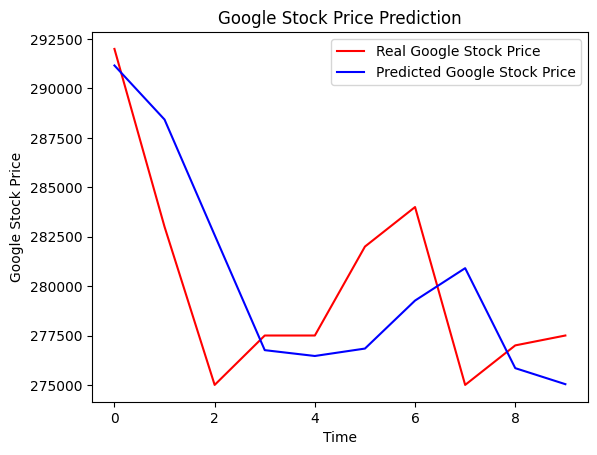

In [94]:
plt.plot(real_price_hyundai, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()